## Mechanics

The module called [`sympy.physics.mechanics`](http://pyvideo.org/video/2653/dynamics-and-control-with-python) 
contains elaborate tools for describing mechanical systems,
manipulating reference frames, forces, and torques.
These specialized functions are not necessary for a first-year mechanics course.
The basic `SymPy` functions like `solve`,
and the vector operations you learned in the previous sections are powerful enough for basic Newtonian mechanics.

### Dynamics

The net force acting on an object is the sum of all the external forces acting on it $\vec{F}_{\textrm{net}} = \sum \vec{F}$.
Since forces are vectors, 
we need to use vector addition to compute the net force.

Compute
$\vec{F}_{\textrm{net}}=\vec{F}_1 + \vec{F}_2$,
where $\vec{F}_1=4\hat{\imath}[\mathrm{N}]$ and $\vec{F}_2 = 5\angle 30^\circ[\mathrm{N}]$:

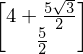

In [154]:
F_1 =  Matrix( [4,0] ) 
F_2 =  Matrix( [5*cos(30*pi/180), 5*sin(30*pi/180) ] )
F_net = F_1 + F_2
F_net                                    # in Newtons

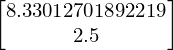

In [155]:
F_net.evalf()                            # in Newtons

To express the answer in length-and-direction notation,
use `norm` to find the length of $\vec{F}_{\textrm{net}}$
and `atan2` (The function `atan2(y,x)` computes the correct direction 
for all vectors $(x,y)$, unlike `atan(y/x)` which requires corrections for angles in the range $[\frac{\pi}{2}, \frac{3\pi}{2}]$.) to find its direction:

In [156]:
F_net.norm().evalf()                     # |F_net| in [N]

In [157]:
(atan2( F_net[1],F_net[0] )*180/pi).n()  # angle in degrees

The net force on the object is $\vec{F}_{\textrm{net}}= 8.697\angle 16.7^\circ$[N].

### Kinematics

Let $x(t)$ denote the position of an object,
$v(t)$ denote its velocity,
and $a(t)$ denote its acceleration.
Together $x(t)$, $v(t)$, and $a(t)$ are known as the *equations of motion* of the object.

The equations of motion are related by the derivative operation:

$$
  a(t) \overset{\frac{d}{dt} }{\longleftarrow} v(t) \overset{\frac{d}{dt} }{\longleftarrow} x(t).
$$

Assume we know the initial position $x_i\equiv x(0)$ and the initial velocity $v_i\equiv v(0)$ of the object 
and we want to find $x(t)$ for all later times.
We can do this starting from the dynamics of the problem&mdash;the forces acting on the object.

Newton's second law $\vec{F}_{\textrm{net}} = m\vec{a}$ states that a net force $\vec{F}_{\textrm{net}}$
applied on an object of mass $m$ produces acceleration $\vec{a}$.
Thus, we can obtain an objects acceleration if we know the net force acting on it.
Starting from the knowledge of $a(t)$, we can obtain $v(t)$ by integrating
then find $x(t)$ by integrating $v(t)$:

$$
a(t) \ \ \ \overset{v_i+ \int\!dt }{\longrightarrow} \ \ \ v(t) \ \ \ \overset{x_i+ \int\!dt }{\longrightarrow} \ \ \ x(t).
$$

The reasoning follows from the fundamental theorem of calculus:
if $a(t)$ represents the change in $v(t)$, 
then the total of $a(t)$ accumulated between $t=t_1$ and $t=t_2$
is equal to the total change in $v(t)$ between these times: $\Delta v = v(t_2) - v(t_1)$.
Similarly, the integral of $v(t)$ from $t=0$ until $t=\tau$ is equal to $x(\tau) - x(0)$.

### Uniform acceleration motion (UAM)

Let's analyze the case where the net force on the object is constant.
A constant force causes a constant acceleration $a = \frac{F}{m} = \textrm{constant}$.
If the acceleration function is constant over time $a(t)=a$.
We find $v(t)$ and $x(t)$ as follows:

In [158]:
t, a, v_i, x_i = symbols('t a v_i x_i')
v = v_i + integrate(a, (t, 0,t) )
v

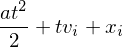

In [159]:
x = x_i + integrate(v, (t, 0,t) )
x

You may remember these equations from your high school physics class.
They are the *uniform accelerated motion* (UAM) equations:

\begin{align*}
 a(t) &= a,                                  \\ 
 v(t) &= v_i  + at,                          \\[-2mm] 
 x(t) &= x_i + v_it + \frac{1}{2}at^2.
\end{align*}

In high school, you probably had to memorize these equations.
Now you know how to derive them yourself starting from first principles.

For the sake of completeness, we'll now derive the fourth UAM equation,
which relates the object's final velocity to the initial velocity,
the displacement, and the acceleration, without reference to time:

In [160]:
(v*v).expand()

In [161]:
((v*v).expand() - 2*a*x).simplify()

The above calculation shows $v_f^2 - 2ax_f = -2ax_i + v_i^2$.
After moving the term $2ax_f$ to the other side of the equation, we obtain

\begin{align*}
 (v(t))^2 \ = \ v_f^2 =  v_i^2  + 2a\Delta x \ = \  v_i^2  + 2a(x_f-x_i).
\end{align*}

The fourth equation is important for practical purposes
because it allows us to solve physics problems in a time-less manner.

#### Example

Find the position function of an object at time $t=3[\mathrm{s}]$, 
if it starts from $x_i=20[\mathrm{m}]$ with $v_i=10[\mathrm{m/s}]$ and undergoes 
a constant acceleration of $a=5[\mathrm{m/s^2}]$.
What is the object's velocity at $t=3[\mathrm{s}]$?

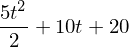

In [162]:
x_i = 20  # initial position
v_i = 10  # initial velocity
a   = 5   # acceleration (constant during motion)
x = x_i + integrate( v_i+integrate(a,(t,0,t)), (t,0,t) )   
x

In [163]:
x.subs({t:3}).n()          # x(3) in [m]

In [164]:
diff(x,t).subs({t:3}).n()  # v(3) in [m/s]

If you think about it,
physics knowledge combined with computer skills is like a superpower!

### General equations of motion

The procedure 
$a(t) \ \overset{v_i+ \int\!dt }{\longrightarrow} \ v(t) \ \overset{x_i+ \int\!dt }{\longrightarrow} \ x(t)$
can be used to obtain the position function $x(t)$ even when the acceleration is not constant.
Suppose the acceleration of an object is $a(t)=\sqrt{k t}$; 
what is its $x(t)$?

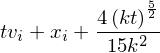

In [165]:
t, v_i, x_i, k = symbols('t v_i x_i k')
a = sqrt(k*t)
x = x_i + integrate( v_i+integrate(a,(t,0,t)), (t, 0,t) )
x

### Potential energy

Instead of working with the kinematic equations of motion $x(t)$, $v(t)$, and $a(t)$ which depend on time,
we can solve physics problems using *energy* calculations.
A key connection between the world of forces and the world of energy is the concept of *potential energy*.
If you move an object against a conservative force (think raising a ball in the air against the force of gravity),
you can think of the work you do agains the force as being stored in the potential energy of the object.

For each force $\vec{F}(x)$ there is a corresponding potential energy $U_F(x)$.
The change in potential energy associated with the force $\vec{F}(x)$ and displacement $\vec{d}$
is defined as the negative of the work done by the force during the displacement: $U_F(x) = - W = - \int_{\vec{d}} \vec{F}(x)\cdot d\vec{x}$.

The potential energies associated with gravity $\vec{F}_g = -mg\hat{\jmath}$
and the force of a spring $\vec{F}_s = -k\vec{x}$ are calculated as follows:

In [166]:
x, y = symbols('x y')
m, g, k, h = symbols('m g k h')
F_g = -m*g  # Force of gravity on mass m 
U_g = - integrate( F_g, (y,0,h) )
U_g         # Grav. potential energy

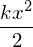

In [167]:
F_s = -k*x  # Spring force for displacement x 
U_s = - integrate( F_s, (x,0,x) )
U_s         # Spring potential energy

Note the negative sign in the formula defining the potential energy.
This negative is canceled by the negative sign of the dot product $\vec{F}\cdot d\vec{x}$:
when the force acts in the direction opposite to the displacement, 
the work done by the force is negative.

### Simple harmonic motion

The force exerted by a spring is given by the formula $F=-kx$.
If the only force acting on a mass $m$ is the force of a spring,
we can use Newton's second law to obtain the following equation:

$$
  F=ma  
  \quad \Rightarrow \quad
  -kx = ma   
  \quad \Rightarrow \quad
  -kx(t) = m\frac{d^2}{dt^2}\Big[x(t)\Big].
$$

The motion of a mass-spring system is described by the *differential equation* $\frac{d^2}{dt^2}x(t) + \omega^2 x(t)=0$,
where the constant $\omega = \sqrt{\frac{k}{m}}$ is called the angular frequency.
We can find the position function $x(t)$ using the `dsolve` method:

In [168]:
t = Symbol('t')                 # time t
x = Function('x')               # position function x(t)
w = Symbol('w', positive=True)  # angular frequency w
sol = dsolve( diff(x(t),t,t) + w**2*x(t), x(t) )
sol

In [169]:
x = sol.rhs           
x

Note the solution $x(t)=C_1\sin(\omega t)+C_2 \cos(\omega t)$ is equivalent to $x(t) = A\cos(\omega t + \phi)$, 
which is more commonly used to describe simple harmonic motion. 
We can use the `expand` function with the argument `trig=True` to convince ourselves of this equivalence:

In [170]:
A, phi = symbols("A phi")
(A*cos(w*t - phi)).expand(trig=True)

If we define $C_1=A\sin(\phi)$ and $C_2=A\cos(\phi)$, 
we obtain the form $x(t)=C_1\sin(\omega t)+C_2 \cos(\omega t)$ that `SymPy` found.

### Conservation of energy

We can verify that the total energy of the mass-spring system is conserved by showing 
$E_T(t) = U_s(t) + K(t) = \textrm{constant}$:

In [171]:
x = sol.rhs.subs({"C1":0,"C2":A}) 
x

In [172]:
v = diff(x, t)
v

In [173]:
E_T = (0.5*k*x**2 + 0.5*m*v**2).simplify()
E_T

In [174]:
E_T.subs({k:m*w**2}).simplify()     # = K_max

In [175]:
E_T.subs({w:sqrt(k/m)}).simplify()  # = U_max